# Projet Python — Stratégie Momentum Long/Short

Le momentum prix constitue une des anomalies empiriques les plus documentées de la finance moderne. De très nombreux travaux académiques ont mis en évidence la persistance de ce phénomène à moyen terme ce qui à remis en question l'hypothèse de l’efficience des marchés. Ce phénomène à fait qu'il y a eu un développement de stratégies d’investissement, systématiques visant à exploiter la persistance de la tendance des prix.
Dans ce contexte, l’objectif de ce projet est d’étudier une stratégie de momentum cross-sectionnel. Cette stratégie repose sur la construction d’un signal momentum qui combine plusieurs paramètres afin de comparer les actifs relativement




#**I. Revue de littérature**

####*1. Le Momentum prix (Jegadeesh & Titman (1993))*
<p style="text-align: justify;">

La littérature en finance empirique met en évidence l’existence d’un phénomène dit de « momentum ». Ce phénomène stipule que les actifs ayant bien performé récemment tendent en moyenne à continuer de surperformer à court et moyen terme.
L’article fondateur sur le momentum des prix de Jegadeesh et Titman (1993) montre que des stratégies consistant à acheter les actions ayant le mieux performé au cours des 3 à 12 derniers mois et à vendre celles ayant le moins bien performé génèrent des rendements anormalement positifs sur les mois suivants.
Ce phénomène remet en cause l’hypothèse d’efficience des marchés, dans la mesure où ces performances ne sont expliquées ni par le risque de marché ni par une exposition particulière au bêta. Toutefois, l’effet momentum est éphémère : sur le long terme, une partie des gains est corrigée, ce qui en fait un phénomène principalement observable sur des horizons de court à moyen terme.
Pour expliquer l’existence du momentum, l’approche la plus retenue est celle de la finance comportementale. L’une des explications majeures repose sur la sous-réaction des investisseurs à l’information nouvelle. Lorsqu’une information arrive sur le marché, les prix ne l’intègrent pas immédiatement ni complètement, ce qui entraîne une poursuite progressive des mouvements de prix.
D’autres biais comportementaux peuvent renforcer cet effet, tels que l’effet de troupeau ou encore la tendance des investisseurs à extrapoler les performances passées.
Dans ce cadre, le momentum ne reflète pas nécessairement une prime de risque fondamentale, mais plutôt une inefficience temporaire des marchés.
</p>

####*2. Momentum et modèles factoriels (Fama & French (1993 ou 2015))*



Un point important de la littérature concerne la relation entre le momentum et les modèles d’évaluation des actifs. Comme indiqué précédemment, le momentum n’est pas entièrement expliqué par les facteurs de risque traditionnels : les stratégies de momentum conservent des rendements anormalement significatifs même après contrôle de ces facteurs.
Eugene Fama et Kenneth French (2014) soulignent que certaines anomalies, dont le momentum, demeurent imparfaitement expliquées par les modèles factoriels existants. Cela suggère que le momentum capte une dimension distincte du comportement des marchés, différente du simple risque systémique.
Dans ce contexte, l’analyse factorielle est souvent utilisée non pas pour justifier l’existence du momentum, mais pour évaluer la nature des expositions d’une stratégie : exposition au marché, aux facteurs classiques, ou encore pour isoler et mesurer un facteur momentum spécifique.

####*3. Momentum cross-sectionnel et momentum temporel (Moskowitz, Ooi & Pedersen (2012))*

On distingue deux grandes formes de momentum :
-Le momentum temporel, qui s’appuie uniquement sur le passé de chaque actif.
-Le momentum cross-sectionnel, qui repose sur la comparaison relative des actifs entre eux.
Tobias Moskowitz, Yao Hua Ooi et Lasse Heje Pedersen (2012) montrent que le momentum temporel est présent sur un large ensemble de classes d’actifs et sur différents marchés. Ils mettent en évidence une persistance des rendements sur des horizons allant jusqu’à 12 mois, suivie d’une inversion partielle à plus long terme.
Dans le cadre d’une stratégie long/short, le momentum cross-sectionnel est particulièrement adapté, puisqu’il permet de construire des portefeuilles fondés sur des positions relatives, indépendamment du niveau général du marché.

####*4. Risque du momentum et gestion de ce risque (Barroso & Santa-Clara (2015))*

Le momentum est associé à des risques spécifiques, notamment des épisodes de pertes importantes lors de retournements soudains de marché, au cours desquels on observe des baisses marquées de performance. Ces « crashes » du momentum ont été largement documentés dans la littérature académique.
Pedro Barroso et Pedro Santa-Clara (2015) montrent que le risque associé au momentum est variable dans le temps et qu’il est en partie prévisible à partir de la volatilité réalisée.
Ils proposent une approche de gestion du risque consistant à ajuster l’exposition de la stratégie en fonction de la volatilité, ce qui permet de réduire significativement les drawdowns et d’améliorer le ratio de Sharpe.
Ces résultats justifient l’intégration, dans une stratégie empirique, de mécanismes de gestion du risque, tels que la pondération inversement proportionnelle à la volatilité ou l’utilisation de filtres de tendance, permettant d’éviter certaines phases de retournement brutal des marchés.

####*5. Positionnement de notre stratégie*

Ainsi, notre stratégie s’inscrit dans la continuité de la littérature sur le momentum cross-sectionnel.
 Nous construisons une stratégie d'actions long/short appliquée à l’univers choisi, en exploitant la persistance des performances relatives à moyen terme.



#**II. Données et univers d’investissement**

####*1)  Univers d’investissement*

L’univers d’investissement retenu pour cette étude est constitué d’actions américaines de grandes capitalisation boursière, ce qui correspond à un S&P 100 élargi. Il comprend environ une centaine de titres parmi les plus importantes capitalisations du marché américain qui couvre une large sélection de secteurs économiques.
Le choix de cet univers est justifié par le niveau de liquidité élevée qu’il présente et des volumes d’échange importants, ce qui permet de limiter les problèmes liés aux coûts de transactions et à l’exécution des ordres. Ensuite, ces titres bénéficient généralement d’une bonne couverture analytique étendue et de données de prix fiables sur une longue période, ce qui est essentielle pour la mise en œuvre du backtest.
Enfin, cet univers est cohérent avec l’étude d’une stratégie type momentum qui sont historiquement bien documentées sur les marchés actions développés, notamment sur les grandes capitalisations boursières américaines.

####*2) Données utilisées*

Les données utilisées dans cette étude, pour chaque titre de l’univers, sont:

Les prix de clôture ajustées et les volumes échangés, à une fréquence quotidienne.
Les prix ajustés comprennent les dividendes et les opérations sur titres, garantissant une mesure correcte des rendements totaux.
Les séries de prix servent à calculer les rendements, les indicateurs de momentum et les métriques de performance du portefeuille. Les volumes sont utilisés à des fins de filtrage de liquidité dans la construction du signal, bien que leur impact soit limité dans un univers composé majoritairement de grandes capitalisations.
La période d’étude débute en janvier 2010 et s’étend jusqu’à la dernière date disponible, couvrant ainsi plusieurs régimes de marché, incluant des phases de forte croissance, des périodes de crise et des épisodes de normalisation monétaire.

#**III. Construction du signal Momentum**

####*1)  Signal simple*

Lorsque l’historique de prix disponible est insuffisant pour estimer l’ensemble des indicateurs composant le signal momentum avancé sur lequel notre projet repose, nous recourons à un signal momentum simple qui nous sert de proxy temporaire.
Pour chaque actif i et à chaque date t, quand le nombre d’observations passées est inférieur au nombre requis pour calculer les moyennes mobiles longues et tout autres indicateurs techniques, le signal est défini comme la performance cumulée sur une fenêtre glissante de k jours :

$$
Momentum_{i,t}^{simple} = \frac{P_{i,t}}{P_{i,t-k}} - 1
$$


Où Pi,t désigne le prix ajusté de l’actif i à la date t, et k est un horizon de court à moyen terme (de 60 jours dans notre implémentation)

Ce signal capture l’idée fondamentale du momentum de prix qui est largement documenté dans la littérature financière, selon laquelle les actifs ayant récemment bien performé continuent en moyenne à bien performer sur le court terme.
Ce signal simple permet aussi d’assurer une continuité du backtest dès la première périodes des données, tout en évitant l’estimation instable des indicateurs qui eux nécessite des historiques des données plus longues.
momentum simple n’est pas le cœur de la stratégie étudiée. Il est uniquement utilisé comme mécanisme de repli (« fallback ») afin de garantir une cohérence temporelle du backtest et d’éviter tout biais du regard vers le futur (« look-ahead bias »). Dès que l’historique de données devient suffisant, le signal momentum avancé, décrit dans la section suivante, est systématiquement privilégié.


####*2)  Signal avancé*

**a) Intuition économique du signal de momentum avancé**

Le signal momentum simple, fondé uniquement sur la performance passée constitue une première approximation efficace du phénomène de persistance des rendements. Néanmoins, une mesure brute du momentum peut s’avérer insuffisante pour distinguer des dynamiques de prix structurelles (hausse durable, soutenue par le marché, tendance claire) de mouvement transitoires(hausse temporaire, due à un évènement ponctuel) ou excessivement risqués(volatilité forte, avec variation extrêmes)
Afin d’améliorer la qualité du signal et de se rapprocher des approches documentées dans la littérature académique sur le momentum, nous construisons un signal de momentum avancé reposant sur une combinaison d’indicateurs complémentaires. L’objectif est d’identifier non seulement les actifs ayant récemment surperformé, mais également ceux dont la performance s’inscrit dans une tendance établie et présente un profil de risque maîtrisé.

Cette approche permet de classer les actifs de manière relative au sein de l’univers d’investissement, dans une logique cross-sectionnelle.

**b) Mesure du momentum à Moyen Terme : ROC à 6 mois**

La première composante du signal avancé repose sur la mesure de la performance récente des actifs à un horizon moyen-terme. Pour chaque actif i et à chaque date t, nous calculons le ROC (Rate of Change) sur une période de 126 jours de bourse, correspondant approximativement à six mois :

$$
ROC_{i,t}^{(126\ \text{jours})} = \frac{P_{i,t}}{P_{i,t-126}} - 1
$$                                          


Où Pi,t désigne le prix ajusté de l’actif i à date t.
Le choix d’un horizon de six mois est cohérent avec la littérature empirique sur le momentum qui met en évidence une persistance des performances à moyen terme. Jegadeesh et Titman (1993) identifient une fenêtre optimale entre 3 et 12 mois, ce qui justifie l’utilisation d’un ROC à 6 mois pour capter la phase active de diffusion de l’information. Cette mesure permet de capter les tendances de prix suffisamment durables, tout en limitant l’influence de bruit de très court terme.

**c)  Filtre de tendance : ratio MA50/MA200**

La performance passée ne permet pas toutefois, à elle seule, de qualifier la nature de la dynamique de prix. Deux actifs peuvent présenter un niveau de performance similaire sur une période donnée, tout en évoluant dans des contextes de tendances très différents. On introduit ainsi un filtre de tendance fondé sur le ratio entre la moyenne mobile courte et une moyenne mobile longue :
       
$$
Ratio\ MA_{i,t} = \frac{MA50_{i,t}}{MA200_{i,t}}
$$

Où MA50i,t et MA200i,t représentent respectivement les moyennes mobiles à 50 et 200 jours.

Ratio MA >1 : le prix évolue au-dessus de sa tendance long terme, ce qui suggère une dynamique haussière plus robuste.

Ce filtre permet de favoriser les actifs dont le momentum est confirmé par une tendance structurelle, et de limiter l’exposition à des rebonds ponctuels ou à des retournements prématurés.

**d)  Classement cross-sectionnel et construction du score de base**

Les indicateurs de momentum et de tendance sont ensuite transformés en rangs percentiles au sein de l’univers d’investissement, à chaque date de rebalancement. Cette approche cross-sectionnelle permet de comparer les actifs relativement aux autres, indépendamment de l’échelle ou de la dispersion absolue des indicateurs.

Ainsi pour chaque actif i, nous calculons :

-Un rang percentile du ROC à six mois

-Un rang percentile du ratio MA50/MA200

Pourquoi le percentile comme méthode de classement des actions ?
Pour comparer de façon relative et non pas absolue.  
On part de l’intuition suivante :
Quelle proportion des actions fait moins bien que cette proportion-là ?
Un rang à 0.5 veut dire que l’action performe mieux que 50% de l’univers, ainsi un rang proche de 1 est très bon, et au contraire un rang proche de 0 est mauvais.
Ces deux rangs sont ensuite combinés pour former un score momentum de base :

$$
Score_{i,t}^{base}
=
0.7 \times Rang\!\left(ROC_{i,t}\right)
+
0.3 \times Rang\!\left(MA\ ratio_{i,t}\right)
$$

La pondération retenue accorde une importance plus forte à la performance récente, tout en intégrant un filtre de tendance afin d’améliorer la stabilité du signal. Le score obtenu ne vise pas à prédire les rendements futurs, mais à classer les actifs de manière relative au sein de l’univers étudié.
Les pondérations attribuées à la composante momentum et à la composante de filtre de tendance ont été définies de manière à refléter l’importance relative des deux métriques utilisées (ROC et ratio de moyennes mobiles) dans la construction du score. Le poids plus élevé accordé au ROC est cohérent avec les recommandations méthodologiques relatives à la construction d’indicateurs composites, selon lesquelles les pondérations doivent refléter l’importance relative des différentes dimensions (OCDE, Handbook on Constructing Composite Indicators).

À titre d'exemple,une étude de 2025 sur un système de trading agentique recommande, en régime de marché normal, un mélange fixe composé à 70% de signaux momentum et 30% de signaux de tendance dans le calcul du signal final . Ce type de répartition reflète l’idée que le momentum (récemment mesuré, par ex. sur 3 à 12 mois) est le principal moteur de la surperformance à court/moyen terme, tandis que le signal de tendance de long terme sert de filtre de confirmation ou de filet de sécurité.

Ainsi, le choix d’une pondération 70/30 correspond à un compromis entre la volonté de privilégier la composante momentum et celle de conserver un rôle significatif pour le filtre de tendance. Une analyse de sensibilité montre toutefois que les résultats restent globalement robustes à des variations raisonnables de ces pondérations.

**e) Ajustements au risque et filtres de qualité**

À partir du score de base $Score^{base}_{i,t}$, on ajoute des filtres pour éviter des signaux “fragiles”.

On obtient d’abord un score préliminaire commun :

$$
Score^{pre}_{i,t}
=
Score^{base}_{i,t}\times penRSI_{i,t}\times penVOL_{i,t}
$$

où $penRSI_{i,t}$ et $penVOL_{i,t}$ sont des coefficients multiplicatifs (entre 0 et 1) qui pénalisent certains titres.

Ils sont presentés ci-dessous.

**Filtre surachat - $penRSI$**

On calcule le RSI sur 14 jours :

$$
RS=\frac{\text{moyenne des gains}}{\text{moyenne des pertes}}
$$

$$
RSI = 100 - \frac{100}{1 + RS}
$$

Dans notre cas, si

$$
RSI_{i,t} > 80
$$

alors on applique la pénalité :

$$
penRSI_{i,t}=0.5
\quad \text{sinon } 1
$$


Le filtre RSI s’appuie sur la définition classique de Wilder (période 14 jours), avec les seuils usuels 70/30 pour repérer les zones de surachat/survente. Plutôt que de couper dès RSI > 70, nous retenons un seuil plus strict RSI > 80, afin de ne pénaliser que les situations d’excès très marqué. L’idée est de limiter l’exposition à des configurations potentiellement explosives ou sujettes à une correction brutale, tout en évitant de casser trop souvent le momentum dans des tendances fortes (où le RSI peut rester durablement élevé). Ce type de filtrage « soft » est cohérent avec la littérature momentum qui montre que les retournements violents se concentrent dans des états de marché extrêmes (par ex. crashs de stratégies momentum documentés par Daniel & Moskowitz, 2016).





**Filtre de liquidité - $penVOL$**

On calcule le volume moyen sur 60 jours. Si le volume est inférieur au seuil retenu, 500 000, on pénalise :

$$
penVOL_{i,t}=0.5
\quad \text{sinon } 1
$$

Le seuil de volume répond à une logique plus pratique qu’optimisée statistiquement : il vise à exclure les titres potentiellement illiquides, pour lesquels les coûts de transaction, les spreads et l’impact de marché rendent le backtest moins crédible. Plusieurs travaux sur les anomalies de prix soulignent que les profits théoriques sont souvent sensibles aux frictions de marché et à la liquidité (par exemple Jegadeesh & Titman, 1993 ; Asness, Moskowitz & Pedersen, 2013). Dans notre cas, l’univers étant composé de large caps US, ce filtre reste peu contraignant : il joue surtout le rôle de garde-fou pour s’assurer que le signal reste compatible avec une mise en œuvre réaliste, en évitant les micro-capitalisations ou les titres trop peu traités.

**Prise en compte de la volatilité : dépend du schéma de pondération**

La volatilité n’est pas intégrée au même endroit selon la méthode de construction du portefeuille (détaillée dans la section suivante):

•	Variante equal-weight : les titres ont le même poid et on ajuste le score par la volatilité (fenêtre 60 jours) :

$$
Score^{ajusté}{i,t}
=
\frac{Score^{base}{i,t}}{\sigma^{60}_{i,t}}
$$


$$
score_{final}^{EW}
=
score_{ajust\acute{e}}\times penRSI \times penVOL
$$

•	Variante $rank \times inverse\text{-}vol$ : on donne plus de poids au titre ayant un rang élevé et une volatilté faible, on conserve le score non ajusté :
$$
score_{final}^{RV}
=
score_{base}\times penRSI \times penVOL
$$

Dans ce second cas, la volatilité sera prise en compte au niveau des poids via $\frac{1}{\sigma_i}$, afin d’éviter de pénaliser deux fois les titres volatils (une fois dans le score et une fois dans le sizing).

**f) Rôle du signal avancé dans la stratégie**

Le score final issu de ces différentes étapes est utilisé pour classer les actifs à chaque date de rebalancement. Les actifs qui ont les scores les plus élevés sont sélectionnés pour constituer le portefeuille long, tandis que ceux présentant les scores les plus faibles constituerons le portefeuille short.

Ce signal avancé constitue le cœur du processus de sélection des titres. On ne cherche pas à prédire les rendements absolus, mais à comprendre les différences relatives de momentum et de la qualité de tendance au sein de l’univers choisi.







#**IV. Construction du portefeuille**

####*1) Sélection des positions long et short*


À chaque date de rebalancement, les actifs de l’univers d’investissement sont classés selon leur score de momentum final comme décrit dans la section précédente. On construit donc le portefeuille sur une approche cross-sectionnelle, c’est-à-dire que l’on classe les actifs les mieux et moins bien classés relativement aux autres.

Les actifs qui appartiennent au quantile supérieur de la distribution des scores vont être choisis pour constituer la poche long du portefeuille, et à contrario les actifs appartenant au quantil inférieur alimentent la poche short.

Dans notre stratégie, nous retenons les 20% des actifs présentant les scores les plus élevés pour les positions longues et les 40% des actifs avec les scores les plus faibles pour les positions courtes.

Le choix d’une poche short plus large que la poche long nous permet de limiter le risque spécifique qui est associé aux positions vendeuses. Les positions short tendent à être plus volatiles et asymétriques, ainsi en augmentant notre diversification dans cette poche nous améliorons la stabilité du portefeuille.

####*2) Exposition globale du portefeuille*


En plus du nombre de titres sélectionnés dans chaque poche, nous ajoutons une contrainte d’exposition globale. La somme des poids des positions longues est fixée à 70% tandis que la somme des positions short est fixée à -30%. Ainsi nous nous retrouvons avec une exposition brute de 100% et une exposition nette de +40%.

Ce choix est motivé par la volonté d’exploiter la prime associée au facteur momentum et une exposition positive au marché actions. Contrairement à une approche market-neutral, cette approche nous permet de bénéficier d’un biais haussier de long terme sur les actions, tout en conservant une dimension relative via les positions short.

Il faut cependant prendre en compte que cette décision implique un risque d’exposition au facteur de marché (que nous analyserons ultérieurement à l’aide de modèles factoriels afin d’évaluer la contribution du bêta aux performances observées)

####*3) Schémas de pondération des titres*


Une fois les actifs sélectionnés pour chaque poche, nous devons à présent déterminer la répartition de capital entre les différents titres. Nous avons donc mis en place deux approches distinctes afin de les comparées ;

**a)La pondération equal-weight**

Dans cette approche, tous les titres sélectionnés reçoivent le même poids au sein de chaque jambe du portefeuille :

•côté long : chaque titre long a un poids identique, de sorte que la somme des poids longs fasse +0,70 ;

•côté short : chaque titre short a un poids identique, de sorte que la somme des poids shorts fasse −0,30.

Concrètement, si on a NL titres en long et NS titres en short :

$$
w_i(t)=\frac{0.70}{N_L}\quad \text{pour } i\in Long
$$

$$
w_i(t)=-\frac{0.30}{N_S}\quad \text{pour } i\in Short
$$

Cette pondération est volontairement simple : elle évite qu’un seul titre prenne trop de place et permet de mesurer la performance du signal sans ajouter de complexité de “sizing” (gestion fine des tailles de position).

$$
score_{final}^{EW}
=
score_{ajust\acute{e}}\times penRSI \times penVOL
$$

**b)La pondération par rang et inverse de la volatilité**

Dans cette approche, les poids ne sont pas égaux : ils dépendent à la fois de la force du signal momentum et du risque.

À chaque date de rebalancement, pour chaque titre sélectionné, on définit une mportance.

Pour les titres en long :
$$
\text{importance}^L_i = \text{rang}_i \times \frac{1}{\sigma_i}
$$

Pour les titres en short :
$$
\text{importance}^S_i = (1 - \text{rang}_i) \times \frac{1}{\sigma_i}
$$

Les titres avec un rang élevé (bon signal) et une volatilité faible auront donc une grande importance en long,  
tandis que les titres avec un rang faible (mauvais signal) et une volatilité faible auront une grande importance en short.

où :
•	$\text{rang}_i$ est le rang (percentile) du score momentum : plus le signal est fort, plus le rang est élevé ;

•	$\sigma_i$ est la volatilité récente (calculée sur une fenêtre courte) : plus un titre est stable, plus $\frac{1}{\sigma_i}$ est grand.

Ensuite, on transforme ces importances en poids en normalisant séparément les positions long et short pour respecter l’exposition cible :

•	Côté long :
$$
w_i = 0.70 \times \frac{\text{importance}i}{\sum{j \in Long}\text{importance}_j}
$$
	•	Côté short :
$$
w_i = -0.30 \times \frac{\text{importance}i}{\sum{j \in Short}\text{importance}_j}
$$

Ainsi, le portefeuille met davantage de capital sur les titres avec signal fort tout en limitant mécaniquement le poids des titres très volatils, ce qui tend à rendre la performance plus stable.


$$
score_{final}^{RV}
=
score_{base}\times penRSI \times penVOL
$$


####*4) Rebalancement du portefeuille*


Le portefeuille est rebalancé à une fréquence mensuelle, qui correspond à la fin de chaque mois calendaire, ajustée au dernier jour de cotation disponible. A chaque date de rebalancement, l’ensemble du processus est répété (recalcul du score momentum, sélection des actifs, détermination des nouveaux poids et mise à jour du portefeuille).

Le choix d’une fréquence mensuelle est justifié par la volonté de faire un compromis entre la réactivité du signal momentum et de la maîtrise des coûts de transactions.

Un rebalancement trop fréquent augmente trop le turnover du portefeuille, tandis qu’un rebalancement trop espacé risquerait de rendre le signal obsolète.

####*5) Turnover et coût de transaction*


Pour rendre le backtest plus réaliste, on applique des coûts de transaction proportionnels au turnover à chaque rebalancement.

À la date de rebalancement t, on passe des poids w_t aux nouveaux poids cibles w_t^{+}.
Le turnover (volume échangé) est défini par :

$$
Turnover_t=\sum_{i=1}^{N}\left|w_{i,t}^{+}-w_{i,t}\right|
$$

On suppose un coût de transaction de 8 bps (0,08%) appliqué à ce turnover.
Le coût payé au rebalancement est donc :

$$
TC_t = 0.0008 \times Turnover_t
$$

Entre deux rebalancements, les poids restent constants : le rendement journalier du portefeuille est :

$$
r_{p,d}=\sum_{i=1}^{N} w_{i,t}^{+}, r_{i,d}
\quad \text{pour } d \in (t,, t_{\text{next}}]
$$

Dans l’implémentation, le coût TC est déduit une seule fois, sur le premier rendement après le rebalancement :

$$
r_{p,t+1}^{net}=r_{p,t+1}^{gross}-TC_t
$$


####*6)Rôle de la construction du portefeuille dans la stratégie*


La construction du portefeuille constitue une étape déterminante dans la mise en œuvre de la stratégie momentum. Elle permet de passer d’un signal de classement relatif en décisions d’investissement concrètes tout en imposant des contraintes de diversification, d’exposition et de gestion de risque. Et ainsi d’évaluer la capacité du signal de momentum à générer des performances robustes dans un cadre réaliste.





## 1) Installation & import du projet

On récupère le code depuis GitHub puis on installe les dépendances.

In [ ]:
!git clone https://github.com/serynezerhouni/Projet-python.git
%cd Projet-python
!ls

Cloning into 'Projet-python'...
remote: Enumerating objects: 338, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 338 (delta 90), reused 10 (delta 10), pack-reused 162 (from 1)
Receiving objects: 100% (338/338), 3.10 MiB | 26.21 MiB/s, done.
Resolving deltas: 100% (129/129), done.
/content/Projet-python/Projet-python/Projet-python
data  main.py  notebook  outs  README.md  requirements.txt  src


In [ ]:
!pip -q install -r requirements.txt

## 2) Exécution du pipeline principal (main.py)

Le fichier `main.py` :
- télécharge les données (yfinance),
- lance le backtest “final”,
- génère des tableaux CSV dans `outs/tables`,
- génère des figures PNG dans `outs/figures`,
- génère les poids  dans `signals`.

On exécute `main.py` pour produire toutes les sorties automatiquement.

In [ ]:
!python main.py

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/content/Projet-python/Projet-python/Projet-python/src/signals.py:58: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = hist_prices.pct_change()
/content/Projet-python/Projet-python/Projet-python/src/signals.py:58: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = hist_prices.pct_change()
/content/Projet-python/Projet-python/Projet-python/src/signals.py:58: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non

In [ ]:
!ls outs
!ls outs/tables
!ls outs/figures

figures  tables
ablation_final.csv	perf_summary.csv	    subperiods_table.csv
capm_7030_vs_5050.csv	returns_final.csv	    train_best_params.csv
ff3_loadings_final.csv	returns_oos_2020_2024.csv   train_grid_2010_2019.csv
perf_final.csv		sensitivity_best_top10.csv  weighting_comparison.csv
perf_oos_2020_2024.csv	sensitivity_grid_full.csv
ablation_sharpe_bar.png       equity_curve.png
drawdown_equal_vs_invvol.png  equity_equal_vs_invvol.png
drawdown_final.png	      equity_final.png
drawdown_oos_2020_2024.png    equity_oos_2020_2024.png
drawdown.png


#**V. Résultats : Backtest global : performance & risque**
  
Dans la section précédente, nous avons présenté deux façons de pondérer les titres sélectionnés :

(i) une pondération equal-weight, simple et peu concentrée, et (ii) une pondération rank × inverse-vol, qui alloue davantage de poids aux titres ayant à la fois un meilleur score momentum et une volatilité plus faible (profil plus “stable”).

La stratégie finale retenue est la seconde (rank × inverse-vol), car elle cherche à mieux exploiter le signal tout en intégrant une contrainte de risque directement dans la construction des poids.Dans la suite, l’ensemble des analyses (robustesse par sous-périodes, CAPM/FF3, ablation, train/test OOS) est réalisé sur cette version finale.

Sur les résultats, la pondération rank × inverse-vol surperforme nettement l’equal-weight : la croissance cumulée est plus forte (equity curve plus haute à long terme), avec un Sharpe supérieur (≈ 0.83 vs ≈ 0.61).

Côté risque, les deux approches restent cohérentes avec la construction long/short (net exposure ≈ 0.40 et gross exposure ≈ 1.00). Le drawdown maximal est du même ordre de grandeur (environ -12% / -15%), mais la stratégie rank × inverse-vol obtient ce profil de drawdown avec une performance nettement plus élevée.

Enfin, le turnover est plus important pour rank × inverse-vol (≈ 0.76 vs ≈ 0.61), ce qui confirme que la stratégie est plus “active” (d’où l’importance d’avoir intégré les coûts de transaction dans le backtest.)

La différence de performance entre les deux variantes ne vient pas du signal lui-même (identique dans les deux cas), mais de la manière dont il est transformé en poids de portefeuille. En equal-weight, tous les titres sélectionnés reçoivent le même poids au sein de chaque jambe, ce qui dilue l’information : un titre avec un signal très fort est traité comme un titre à signal moyen, indépendamment de sa volatilité.

À l’inverse, la version rank × inverse-vol fait dépendre la taille des positions à la fois de la force du signal (rang du score) et du niveau de risque (via $\frac{1}{\sigma}$ à court terme) : les titres à momentum fort et volatilité modérée sont surpondérés, tandis que les titres plus volatils ou au signal moins convaincant sont sous-pondérés. Cette allocation plus “efficiente” du budget de risque permet d’exploiter davantage le signal tout en contrôlant mieux la dispersion des rendements, ce qui est cohérent avec le Sharpe plus élevé et les drawdowns plus contenus observés pour la variante rank × inverse-vol par rapport à l’equal-weight.

In [ ]:
# @title
cmp = (
    pd.read_csv("outs/tables/weighting_comparison.csv")
      .drop(columns=["Unnamed: 0"], errors="ignore")
)

(
    cmp.style
      .format({
          "CAGR":"{:.2f}",
          "Total Return":"{:.2f}",
          "Volatility (ann.)":"{:.2f}",
          "Sharpe (ann.)":"{:.2f}",
          "Max Drawdown":"{:.2f}",
          "Avg Net Exposure":"{:.2f}",
          "Avg Gross Exposure":"{:.2f}",
          "Avg Turnover":"{:.2f}",
      })
      .hide(axis="index")
)

label,CAGR,Total Return,Volatility (ann.),Sharpe (ann.),Max Drawdown,Avg Net Exposure,Avg Gross Exposure,Avg Turnover
equal_weight,0.05,1.08,0.08,0.61,-0.15,0.40,1.00,0.61
rank_inv_vol,0.08,2.46,0.10,0.83,-0.12,0.40,1.00,0.76


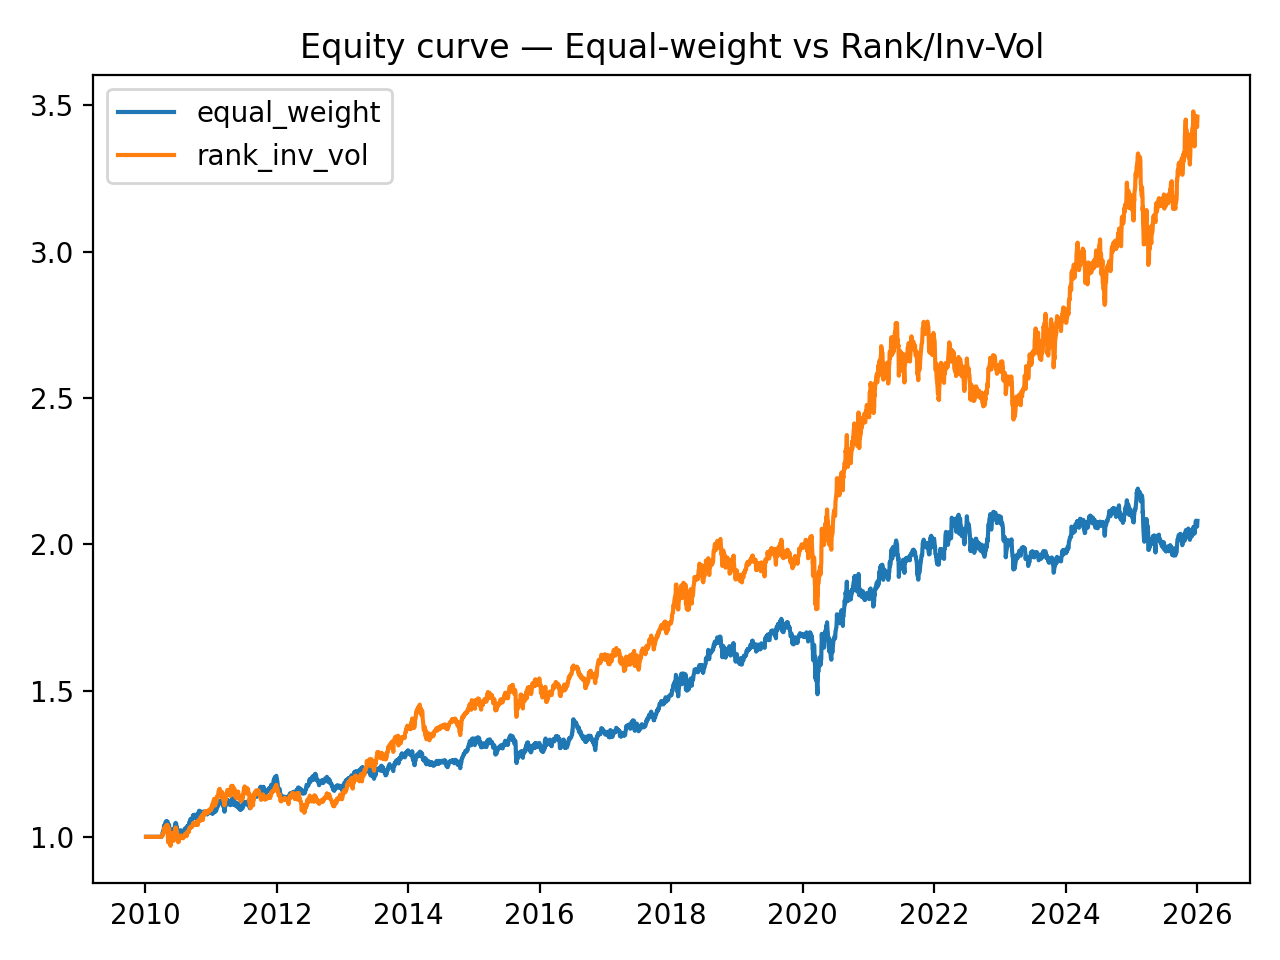

In [ ]:
# @title
display(Image(filename="outs/figures/equity_equal_vs_invvol.png"))

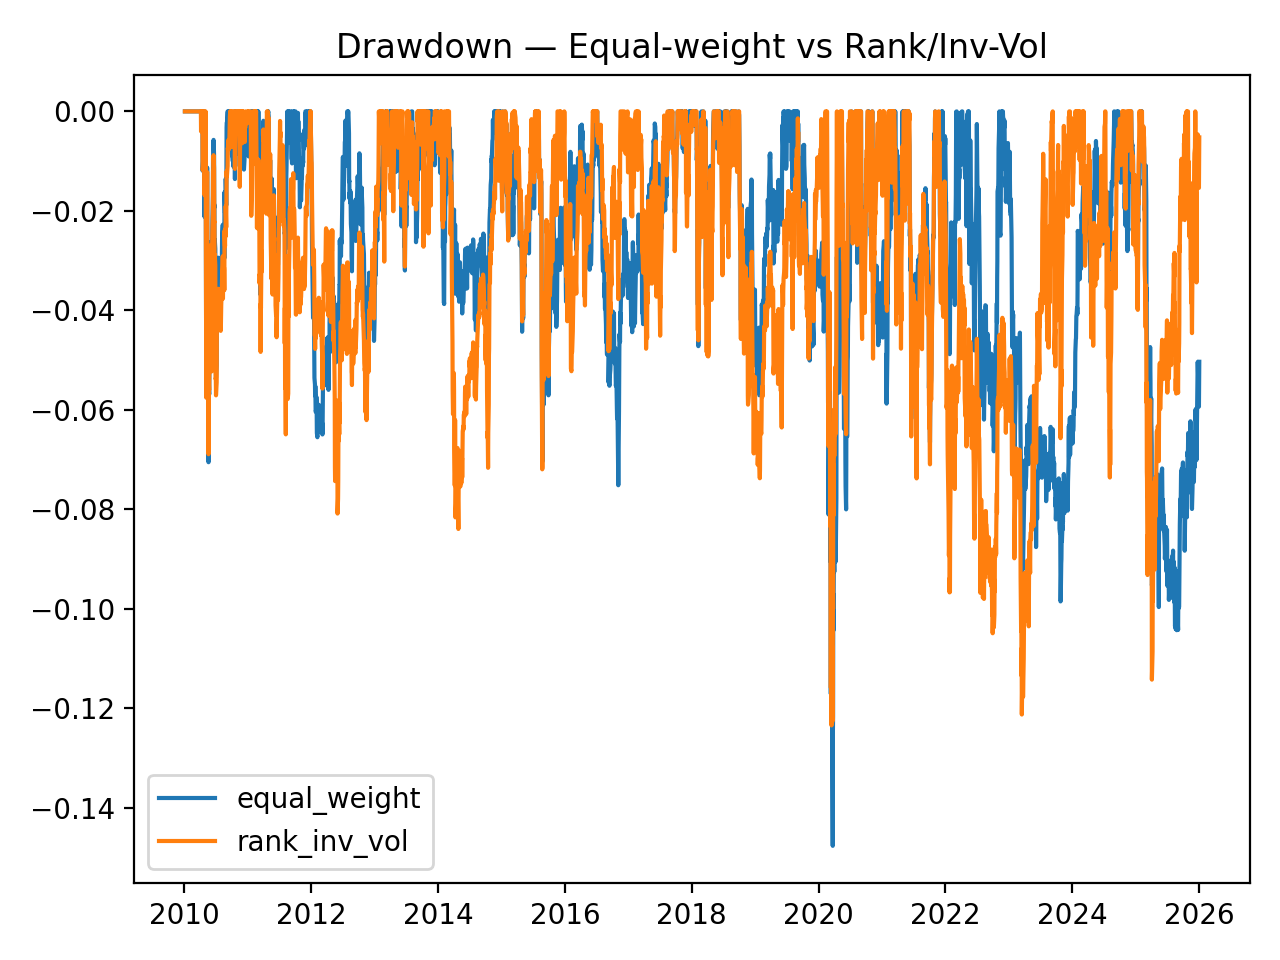

In [ ]:
# @title
display(Image(filename="outs/figures/drawdown_equal_vs_invvol.png"))

#**VI. Analyses de robustesse et diagnostics**



####*1) Analyse de sensibilité*

On commence par une analyse de sensibilité des paramètres clés de construction du portefeuille (proportions sélectionnées en long/short via TOP et BOTTOM, et choix de l’allocation globale 70/30 vs 50/50) afin d’identifier un réglage qui maximise la performance ajustée du risque tout en restant suffisamment diversifié et stable.

Cette analyse est menée sur l’échantillon complet disponible (2010 à dernière date disponible).

Une fois ce paramétrage retenu, on vérifie ensuite que la performance ne s’explique pas seulement par une exposition au marché : on estime d’abord un CAPM (alpha/bêta), puis on complète par un Fama–French 3 facteurs pour mesurer la part de performance expliquée par les facteurs et l’éventuel alpha résiduel.



In [ ]:
# @title
(
    pd.read_csv("outs/tables/sensitivity_grid_full.csv")
      .drop(columns=["Unnamed: 0"], errors="ignore")
      .sort_values("Sharpe", ascending=False)
      .head(10)
      .style
      .format("{:.2f}", subset=["TOP_PCT","BOTTOM_PCT","L","S","CAGR","Sharpe","Vol","MaxDD"])
      .hide(axis="index")
)

TOP_PCT,BOTTOM_PCT,L,S,CAGR,Sharpe,Vol,MaxDD
0.20,0.40,0.70,0.30,0.08,0.83,0.10,-0.12
0.20,0.20,0.70,0.30,0.08,0.81,0.10,-0.12
0.10,0.40,0.70,0.30,0.09,0.78,0.12,-0.16
0.10,0.20,0.70,0.30,0.09,0.77,0.13,-0.16
0.10,0.40,0.50,0.50,0.02,0.23,0.09,-0.17
0.10,0.20,0.50,0.50,0.02,0.21,0.10,-0.21
0.20,0.40,0.50,0.50,0.01,0.15,0.07,-0.15
0.20,0.20,0.50,0.50,0.01,0.13,0.09,-0.23


Les tests montrent que la structure 70% long / 30% short est préférable à la version 50/50 :

la stratégie devient nettement plus exploitable car la performance ajustée du risque est plus élevée, alors que les configurations 50/50 restent faibles.

Dans la grille testée, TOP = 0,2 (on achète les 20% d’actions avec les meilleurs scores) offre le meilleur équilibre entre signal et diversification, évitant une trop forte concentration. Côté short, BOTTOM = 0,4 (on vend les 40% d’actions avec les scores les plus faibles) améliore la robustesse en diversifiant davantage la jambe short, donc en réduisant le bruit.

On retient donc TOP=0,2 / BOTTOM=0,4 / 70–30 car c’est le paramétrage qui donne le meilleur compromis entre qualité du signal, diversification et stabilité des résultats.


####*2. Analyse factorielle: CAPM et Fama-French*

Pour s’assurer que ces résultats ne proviennent pas simplement d’une exposition mécanique au marché (notamment parce que la version 70/30 porte une exposition nette positive), nous complétons l’analyse par une décomposition « factorielle » des performances. On commence par un CAPM, qui permet d’estimer le bêta de la stratégie et de vérifier si la surperformance se résume à un risque actions plus élevé. On étend ensuite l’exercice au modèle Fama–French à 3 facteurs, afin d’identifier la part de performance expliquée par des facteurs systématiques (marché, taille, value) et d’évaluer si la stratégie conserve un alpha une fois ces expositions contrôlées.

Nous avons comparé deux configurations d’exposition globale, en conservant le même signal de momentum et la même logique de construction du portefeuille :

* Portefeuille dollar-neutral (50 % long / 50 % short)

* Portefeuille tilté long (70 % long / 30 % short)

La version 50/50 est conçue pour être quasi neutre au marché. Cela se vérifie dans la régression CAPM : le bêta marché est proche de zéro (β ≈ −0,01), ce qui confirme que la stratégie ne capte pas la direction générale des actions.

En revanche, la performance ajustée du risque est faible : Sharpe ≈ 0,14, avec une performance globale limitée. Autrement dit, en imposant une neutralité stricte, le signal de momentum seul ne suffit pas à générer un profil rendement/risque attractif sur l’échantillon.


##CAPM

In [ ]:
# @title
capm = (
    pd.read_csv("outs/tables/capm_7030_vs_5050.csv")
      .drop(columns=["Unnamed: 0"], errors="ignore")
)

capm.style.format("{:.2f}").hide(axis="index")

L,S,CAGR,Sharpe,Vol,MaxDD,Avg Turnover,beta_mkt,alpha_ann,R2_CAPM
0.50,0.50,0.01,0.15,0.07,-0.15,0.72,-0.01,0.01,0.00
0.70,0.30,0.08,0.83,0.10,-0.12,0.76,0.37,0.04,0.41


La version 70/30 accepte volontairement une exposition directionnelle modérée. Le CAPM montre un bêta marché plus élevé (β ≈ 0,37), ce qui indique que la stratégie profite partiellement des phases de hausse du marché actions.

Cette modification s’accompagne d’une amélioration nette du profil risque/rendement : Sharpe ≈ 0,83, bien supérieur à la version 50/50.

De plus, la régression CAPM indique un alpha annualisé positif (α ≈ 3,6 %), ce qui suggère que la performance n’est pas uniquement due à l’exposition au marché.

Le passage à 70/30 augmente le bêta comme attendu, mais il s’accompagne surtout d’une amélioration importante du Sharpe et d’un alpha positif, ce qui rend la stratégie plus “investissable” en pratique.


##Fama-Franch à 3 facteurs

In [ ]:
# @title
ff3 = (
    pd.read_csv("outs/tables/ff3_loadings_final.csv")
      .drop(columns=["Unnamed: 0"], errors="ignore")
)

ff3.style.format("{:.2f}").hide(axis="index")

alpha_ann,r2,load_Mkt,load_SMB,load_HML
0.02,0.44,0.37,-0.10,-0.11


 Nous complétons l’analyse par une régression Fama–French à 3 facteurs (MKT, SMB, HML).

Pour la configuration 70/30, les résultats montrent :

•	Un alpha Fama–French annualisé positif (α ≈ 1,6 %) : même après contrôle des facteurs de marché, taille et value, il reste une composante de performance non expliquée par ces facteurs.

•	Une charge positive au facteur marché cohérente avec le tilt long (load_MKT ≈ 0,37).

•	Des expositions négatives à SMB et HML, cohérentes avec un univers large caps / plutôt “growth”.

•	Un R² ≈ 0,44, indiquant que les facteurs expliquent une part significative des variations des rendements, mais qu’une fraction importante reste spécifique.

Ces résultats confirment que la version 70/30 ne se réduit pas à une simple exposition marché :

Elle comporte bien une dimension expliquée par les facteurs traditionnels, mais conserve un alpha positif après contrôle, compatible avec une composante liée au signal de momentum.

La version 50/50 remplit l’objectif de neutralité (β ≈ 0) mais produit une performance ajustée du risque trop faible. À l’inverse, la version 70/30 introduit un bêta modéré, mais améliore fortement le Sharpe et conserve un alpha positif en CAPM et en Fama–French.

Ainsi, le choix de 70 % long / 30 % short est justifié comme un compromis :

•	moins “market-neutral” mais plus robuste en performance,

•	davantage assimilable à un smart beta momentum avec biais actions contrôlé, plutôt qu’à une stratégie purement décorrélée.

####*3. Test d’ablation des composantes du signal*





In [ ]:
# @title
ablation = (
    pd.read_csv("outs/tables/ablation_final.csv")
      .drop(columns=["Unnamed: 0"], errors="ignore")
)

ablation.style.format("{:.2f}", subset=["CAGR","Sharpe","Vol","MaxDD"]).hide(axis="index")

variant,CAGR,Sharpe,Vol,MaxDD
baseline_final,0.08,0.83,0.10,-0.12
no_RSI,0.09,0.94,0.10,-0.12
no_volume,0.08,0.83,0.10,-0.12
no_RSI_no_volume,0.09,0.92,0.10,-0.12


Pour comprendre ce qui crée vraiment la performance, on teste la stratégie finale en gardant exactement la même construction de portefeuille (TOP/BOTTOM, 70/30, rebal mensuel, pondération rank×inv-vol, coûts), mais en désactivant certaines briques du signal.

Sur l’échantillon complet (2010 à la dernière date), on observe :


*   Le filtre RSI est contre-productif dans notre cas. Quand on retire la pénalité RSI (no_RSI), le Sharpe augmente nettement (et le CAGR aussi). Autrement dit, pénaliser les titres “surachetés” revient souvent à sortir trop tôt des winners, ce qui est précisément l’opposé de l’effet recherché par une stratégie momentum (laisser courir les gagnants).

*  Le filtre volume est quasi neutre (no_volume ≈ baseline). C’est cohérent avec un univers large caps : très peu de titres sont réellement “illiquides”, donc la pénalité volume est rarement activée et ne change pas le portefeuille.


* Le meilleur résultat est obtenu quand on enlève RSI (avec ou sans volume) : ça confirme que la performance vient surtout du signal momentum pur (ROC + tendance), et que l’ajout de garde-fous “techniques” n’améliore pas la robustesse ici.


Cette ablation study renforce l’interprétation suivante : la performance est portée par le cœur du signal momentum, pas par les pénalités annexes. Le RSI, tel qu’on l’a paramétré (seuil/pénalité), réduit la capacité de la stratégie à capter les tendances fortes, tandis que le filtre volume n’est pas un driver sur ce marché.


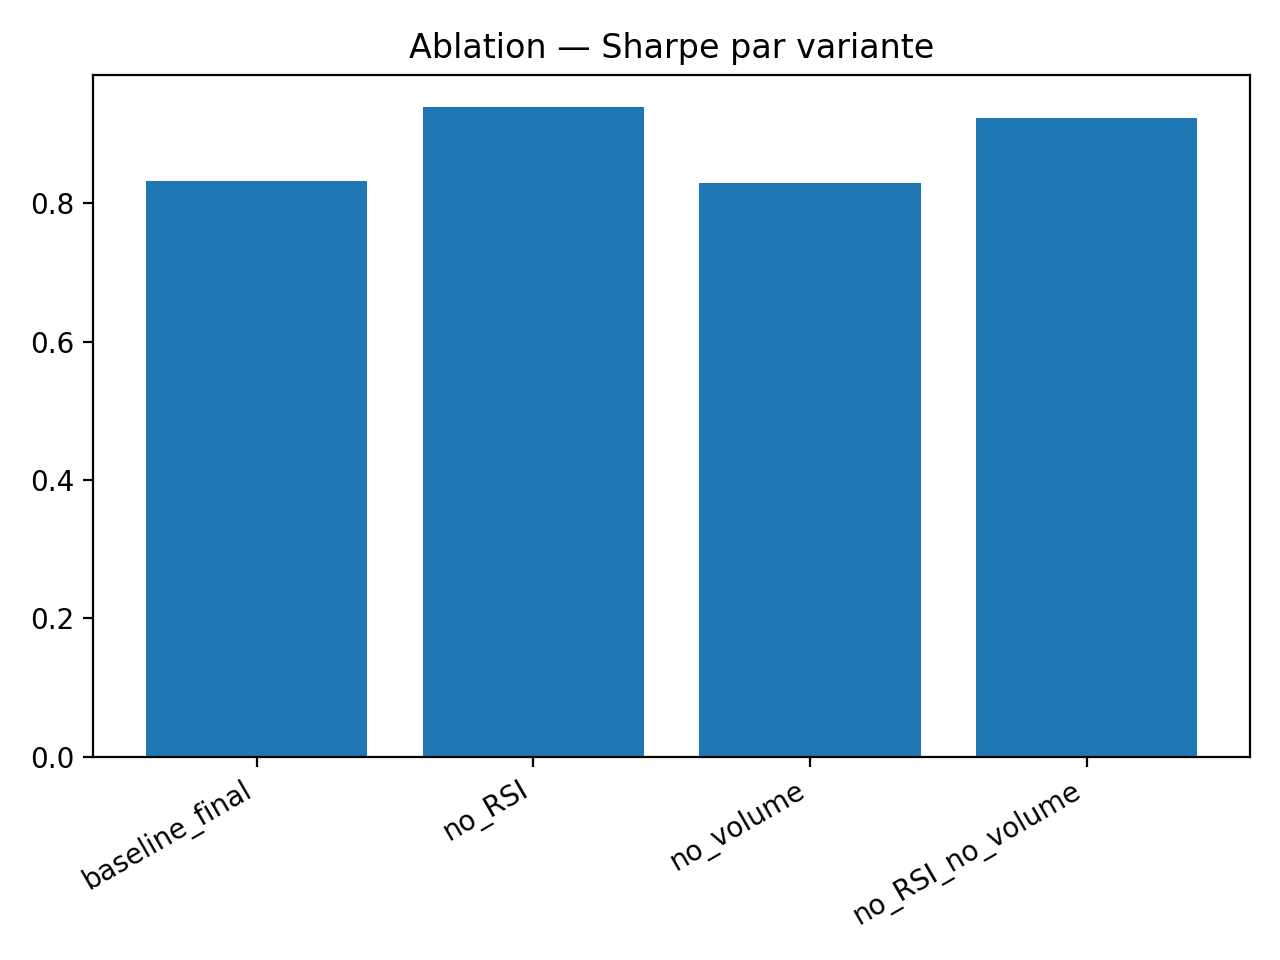

In [ ]:
# @title
display(Image(filename="outs/figures/ablation_sharpe_bar.png"))

####*4. Analyse de la dynamique temporelle et des sous-périodes*

Pour vérifier que la performance de la stratégie ne dépend pas uniquement d’un régime de marché particulier, nous avons découpé l’historique en trois sous-périodes (2010–2014, 2015–2019, 2020–2024) et relancé la même stratégie avec les mêmes règles sur chacune d’elles.

Les résultats montrent que la stratégie reste globalement stable d’une période à l’autre :

Le Sharpe est élevé et du même ordre sur les trois fenêtres, ce qui suggère que le signal n’est pas uniquement “chanceux” sur une seule sous-période.

On observe toutefois des différences cohérentes avec les régimes de marché :

La période 2020–2024 présente une volatilité et un drawdown plus marqués (marché plus heurté), mais la performance ajustée du risque demeure solide.

Ces tests vont dans le sens d’une stratégie robuste à travers plusieurs contextes de marché, plutôt qu’un résultat concentré sur une seule phase.



In [ ]:
# @title
sub = (
    pd.read_csv("outs/tables/subperiods_table.csv")
      .drop(columns=["Unnamed: 0"], errors="ignore")   # enlève la colonne parasite
)

(
    sub.style
      .format({"CAGR":"{:.2f}", "Sharpe":"{:.2f}", "Vol":"{:.2f}", "MaxDD":"{:.2f}"})
      .hide(axis="index")  # enlève la 1ère colonne d'index à gauche
)

start,end,CAGR,Sharpe,Vol,MaxDD
2010-01-01,2014-12-31,0.08,0.93,0.08,-0.08
2015-01-01,2019-12-31,0.07,0.88,0.08,-0.07
2020-01-01,2024-12-31,0.10,0.96,0.11,-0.12


####*5. Cross-validation : calibration sur 2010–2019 puis test hors-échantillon sur 2020–2024*

Pour limiter le risque de sur-optimisation, nous avons mis en place un schéma de type train/test :

**Train / calibration (2010–2019) :** on utilise cette période pour choisir une configuration de paramètres (exposition long/short, TOP/BOTTOM, etc.).

**Test hors-échantillon (2020–2024) :** on fige ces choix “comme si on était fin 2019”, puis on applique la stratégie sur 2020–2024 sans retoucher les paramètres.



In [ ]:
# @title
import pandas as pd
from IPython.display import display, Image
def pretty(df, n=None):

    df = df.loc[:, ~df.columns.astype(str).str.contains(r"^Unnamed", regex=True)]

    df = df.reset_index(drop=True)
    if n is not None:
        df = df.head(n)
    return df.style.format("{:.2f}").hide(axis="index")

grid_train  = pd.read_csv("outs/tables/train_grid_2010_2019.csv")
best_params = pd.read_csv("outs/tables/train_best_params.csv")
perf_oos    = pd.read_csv("outs/tables/perf_oos_2020_2024.csv")



In [ ]:
display(pretty(grid_train, 10))

TOP_PCT,BOTTOM_PCT,L,S,CAGR,Sharpe,Vol,MaxDD,Avg Turnover
0.20,0.40,0.70,0.30,0.07,0.86,0.08,-0.08,0.77
0.10,0.40,0.70,0.30,0.09,0.83,0.11,-0.15,0.86
0.20,0.20,0.70,0.30,0.07,0.78,0.09,-0.10,0.82
0.10,0.20,0.70,0.30,0.08,0.78,0.11,-0.16,0.92
0.10,0.40,0.50,0.50,0.01,0.17,0.07,-0.17,0.79
0.10,0.20,0.50,0.50,0.00,0.05,0.08,-0.21,0.88
0.20,0.40,0.50,0.50,-0.00,0.01,0.06,-0.15,0.72
0.20,0.20,0.50,0.50,-0.01,-0.10,0.07,-0.20,0.81


Cette grille sert à choisir les paramètres uniquement sur 2010–2019. L’idée est de ne pas “raconter une histoire” après coup : on fixe une règle de sélection (ex. Sharpe) et on retient la meilleure combinaison sur la période train. Ça limite le sur-fit parce qu’on ne calibre pas les paramètres en regardant directement la période suivant

In [ ]:
# @title
display(pretty(best_params))

TOP_PCT,BOTTOM_PCT,L,S,CAGR,Sharpe,Vol,MaxDD,Avg Turnover
0.20,0.40,0.70,0.30,0.07,0.86,0.08,-0.08,0.77


Ici, on “fige” le choix comme si on était fin 2019 : ces paramètres deviennent la configuration finale, et ils ne changent plus. C’est important contre le sur-fit : si on retouchait les paramètres après avoir vu 2020–2024, on serait en train d’optimiser sur la période test (donc de tricher sans le vouloir).

In [ ]:
# @title
display(pretty(perf_oos))

CAGR,Total Return,Volatility (ann.),Sharpe (ann.),Max Drawdown,Avg Net Exposure,Avg Gross Exposure,Avg Turnover
0.10,0.63,0.11,0.96,-0.12,0.40,1.00,0.77


Cette table montre la performance sur une période jamais utilisée pour calibrer. Si la stratégie garde des métriques correctes (performance positive, Sharpe raisonnable, drawdown contenu), c’est un signal que le résultat ne vient pas seulement d’un ajustement “trop parfait” à 2010–2019. À l’inverse, si tout s’effondre hors-échantillon, c’est souvent le symptôme typique d’un sur-fit.

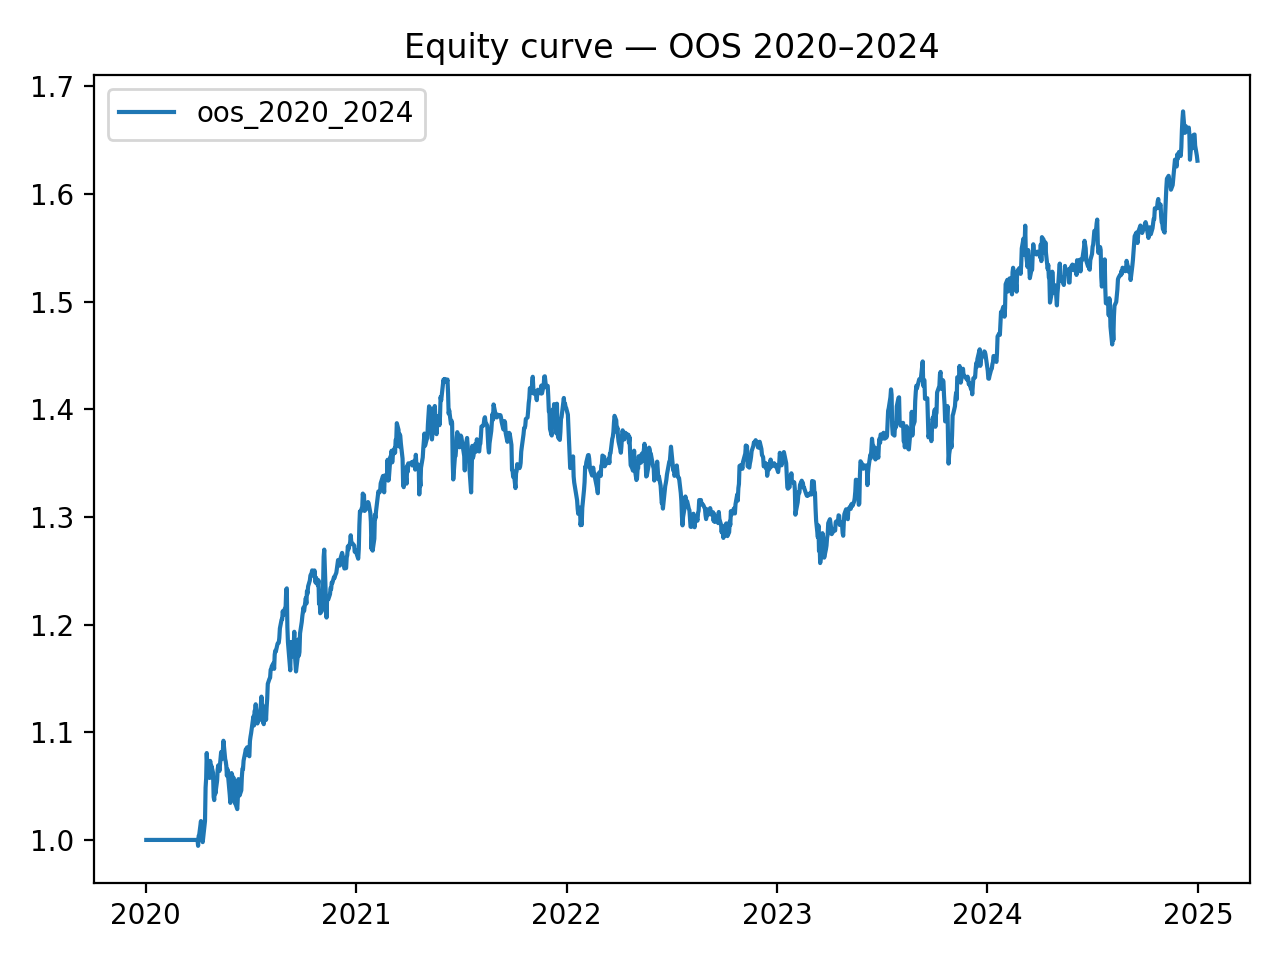

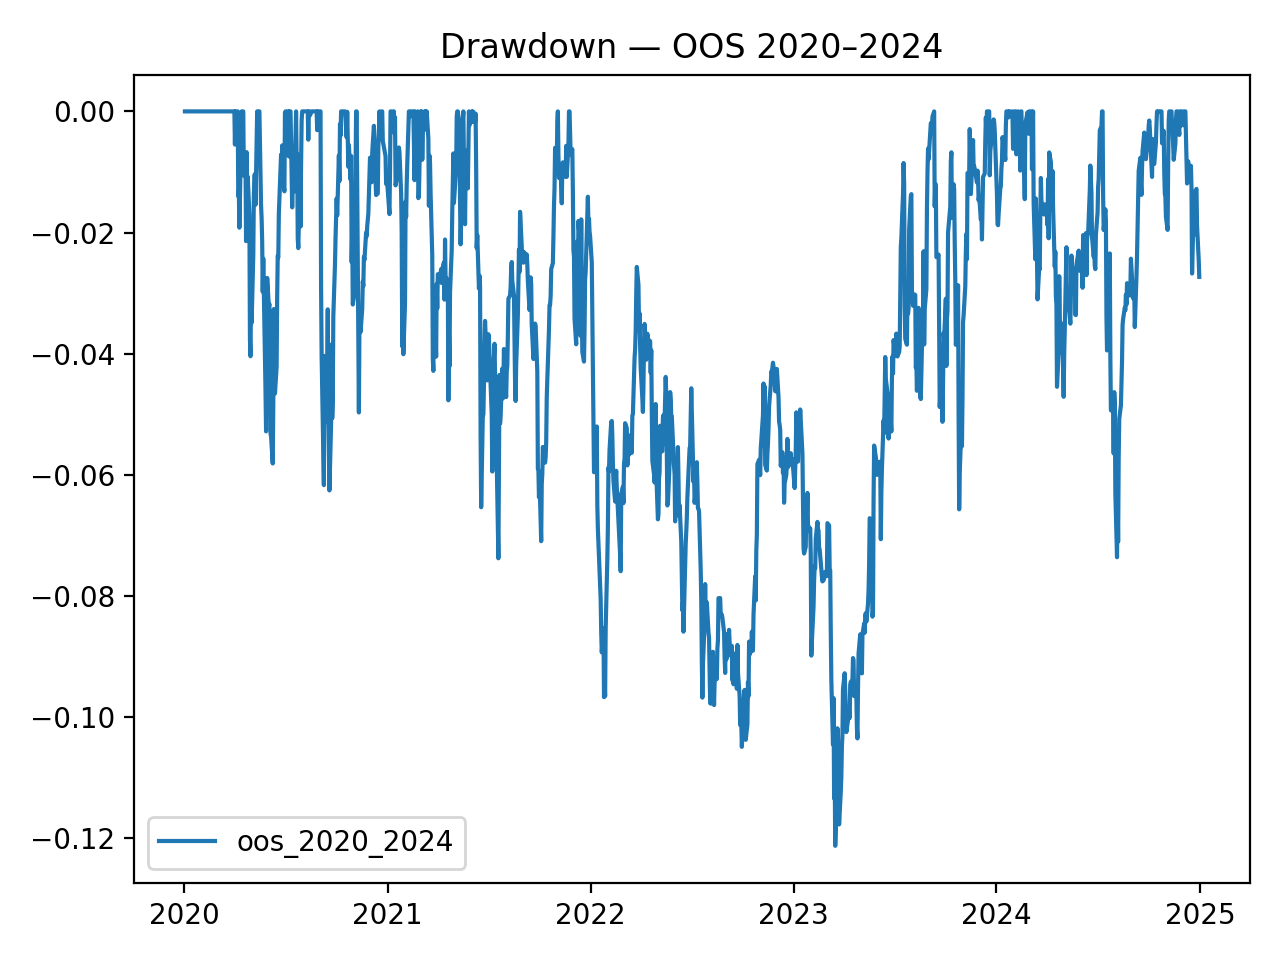

In [ ]:
# @title
display(Image("outs/figures/equity_oos_2020_2024.png"))
display(Image("outs/figures/drawdown_oos_2020_2024.png"))

Ce schéma train/test rend l’évaluation beaucoup plus crédible. On sélectionne les paramètres sur 2010–2019, puis on vérifie que la stratégie reste performante sur 2020–2024 sans aucun ajustement. Le fait que les résultats tiennent hors-échantillon suggère que la stratégie capte un effet plus “structurel” (momentum/tendance) plutôt qu’un réglage opportuniste sur le passé ; autrement dit, ça réduit fortement le soupçon de sur-fit et renforce l’argument de robustesse/généralisation.

## Limites & Conclusion

#**VII. Limites et  biais**

####*1)  Biais liés à l’univers d’investissement*

L’univers d’investissement retenu dans cette étude est composé d’actions américaines de grande capitalisation, correspondant approximativement à un univers de type S&P 100 élargi.

Ce choix présente l’avantage d’une forte liquidité des titres et d’une bonne qualité et disponibilité des données mais il introduit aussi quelques biais que nous nous devons de souligner.

L’univers est construit à partir des grandes capitalisations actuelles, ce qui introduit un biais de « survivorship ». Les entreprises qui sont aujourd’hui présentes dans l’indice ne reflètent pas forcément l’ensemble des entreprises qui composaient cet univers au début de la période étudiée.

En l’absence de données historiques détaillées sur la capitalisation boursière permettant de construire un univers dynamique, ce biais n’a pas pu être corrigé et constitue une limite de notre analyse.

####*2)  Exposition au facteur de marché*

Le choix d’une exposition 70% long / 30% short génère une exposition nette positive au marché. Une partie de la performance peut donc provenir de la prime actions (bêta).

Les régressions CAPM/Fama–French servent à isoler cette composante, mais elles restent une approximation : la stratégie est davantage assimilable à un smart beta momentum avec biais actions contrôlé, plutôt qu’à une approche totalement décorrélée.

####*3)  Sensibilité aux paramètres et risque de sur-optimisation*

Nous avons mis en place plusieurs éléments de robustesse :

(i) une analyse par sous-périodes (2010–2014, 2015–2019, 2020–2024) afin de vérifier la stabilité du comportement de la stratégie à travers des régimes de marché différents, et (ii) un test hors-échantillon où les hyperparamètres sont fixés à la fin de 2019 puis appliqués sur 2020–2024.

Ces contrôles réduisent le risque de sur-ajustement, mais ne l’élimine pas complètement, car la stratégie a été évaluée sur plusieurs choix de paramètres (TOP/BOTTOM, exposition 70/30 vs 50/50) et plusieurs variantes de score (avec/sans RSI, avec/sans volume, avec/sans ajustement par la volatilité).

Cette multiplicité de tests crée un risque de data-snooping :

certaines configurations peuvent apparaître meilleures simplement par hasard sur l’échantillon étudié. Une validation encore plus stricte consisterait à utiliser une procédure de type walk-forward , pour confirmer que le choix de paramètres reste performant sans ré-optimisation implicite

####*4)  Hypothèse de pondération et gestion du risque*

Dans la variante ou la pondération des titres est basée sur une combinaison du rang du signa de momentum et de l’inverse de la volatilité, il est supposé qu’il existe une relation systématique entre l’intensité du signal, le niveau de risque et la taille optimale de la position, ces variables évoluant dans le même sens.

Cependant, l’utilisation de rangs percentiles introduit une hypothèse de linéarité qui peut être discutée.

####*5)  Limites liées aux indicateurs techniques*

Le score de momentum utilisé repose sur une combinaison d’indicateurs (ROC, ratio de moyennes mobiles) et de pénalisations (RSI, volume, ajustement par la volatilité).

Les tests d’ablation réalisés (retrait d’une brique à la fois) montrent que toutes les composantes ne contribuent pas de manière robuste :

le filtre volume est très rarement activé dans un univers de large caps, et la pénalisation RSI peut dégrader la performance selon les périodes. Cela implique que le score reste en partie paramétrique et “hand-crafted” (pondérations, seuils, facteurs de pénalité), et qu’une partie de sa construction peut capter du bruit plutôt qu’un effet structurel.

En conséquence, la stratégie doit être présentée comme un signal momentum enrichi mais dont certaines briques sont discutables et doivent être justifiées empiriquement (ablation) plutôt que supposées utiles a priori.

####*6)  Perspectives d’extension de la stratégie*

Plusieurs pistes d’amélioration peuvent être envisagées afin d’enrichir l’analyse.

Tout d’abord, une version long-only de la stratégie pourrait être étudiée dans une optique de smart beta, permettant d’évaluer la capacité du signal de momentum à améliorer le ratio de Sharpe sans recourir aux ventes à découvert.

Par ailleurs, une neutralisation sectorielle ou une déclinaison de la stratégie par secteur d’activité permettrait d’analyser la concentration sectorielle du signal et d’identifier d’éventuelles sources de risque non désirées.

###**Conclusion:**

Ce projet a étudié empiriquement une stratégie de momentum cross-sectionnel appliquée à un univers d’actions américaines de grande capitalisation, en combinant la construction du signal et une méthodologie de backtest rigoureuse. Le signal proposé repose sur une mesure de la performance passée enrichie par un filtre de tendance et un ajustement explicite du risque, permettant de classer les actifs de manière relative au sein de l’univers considéré.

Les résultats empiriques montrent que la stratégie est capable de générer des performances positives sur l’ensemble de la période étudiée. L’analyse factorielle met en évidence que, bien que la stratégie présente une exposition au facteur de marché dans certaines configurations, un alpha subsiste après contrôle des facteurs traditionnels, suggérant que la performance ne s’explique pas uniquement par le bêta marché.

Les analyses de robustesse, incluant des tests de sensibilité des paramètres, des tests d’ablation et un backtest hors échantillon, renforcent la crédibilité des résultats et indiquent que la performance de la stratégie ne repose pas sur une configuration spécifique optimisée ex post. Elles soulignent également le rôle central de l’ajustement par la volatilité dans l’amélioration de la performance ajustée du risque.

Néanmoins, certaines limites subsistent, notamment en ce qui concerne la construction de l’univers d’investissement, la dépendance aux hypothèses de pondération et le cadre factoriel retenu pour l’analyse de l’alpha. Ces limites ouvrent la voie à plusieurs extensions possibles, telles que l’étude d’approches long-only, la neutralisation sectorielle ou l’intégration de modèles factoriels plus complets.
